In [1]:
library(cluster)
library(dummies)
library(data.table)
library(party)
library(e1071)
library(dbscan)
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering algorithms & visualization
library(mice)
library(purrr)

dummies-1.5.6 provided by Decision Patterns

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.0.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.6
v tidyr   0.8.1     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::between()    masks data.table::between()
x stringr::boundary() masks strucchange::boundary()
x dplyr::filter()     masks stats::filter()
x dplyr::first()      masks data.table::first()
x dplyr::lag()        masks stats::lag()
x dplyr::last()       masks data.table::last()
x purrr::transpos

In [72]:
data <- read.csv(file="connect-4.csv",header=TRUE)
dataNumeric = lapply(data, as.numeric)
dataNumeric = as.data.frame(dataNumeric)
head(dataNumeric)
summary(data)
str(data)

X,b,b.1,b.2,b.3,b.4,b.5,b.6,b.7,b.8,...,b.25,b.26,b.27,b.28,b.29,b.30,b.31,b.32,b.33,win
1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,2,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,2,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,...,1,1,1,2,1,1,1,1,1,1
6,1,1,1,1,1,1,3,1,1,...,1,1,1,1,1,1,1,1,1,0


       X         b         b.1       b.2       b.3       b.4       b.5      
 Min.   :    1   b:24981   b:43384   b:55332   b:61615   b:65264   b:67039  
 1st Qu.:16890   o:20324   o:12024   o: 6275   o: 3090   o: 1155   o:  364  
 Median :33779   x:22251   x:12148   x: 5949   x: 2851   x: 1137   x:  153  
 Mean   :33779                                                              
 3rd Qu.:50667                                                              
 Max.   :67556                                                              
 b.6       b.7       b.8       b.9       b.10      b.11      x        
 b:21771   b:41179   b:54351   b:61205   b:65203   b:67041   b:16303  
 o:19896   o:13264   o: 6847   o: 3309   o: 1214   o:  362   o:19221  
 x:25889   x:13113   x: 6358   x: 3042   x: 1139   x:  153   x:32032  
                                                                      
                                                                      
                                   

'data.frame':	67556 obs. of  44 variables:
 $ X   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ b   : Factor w/ 3 levels "b","o","x": 1 1 1 2 1 1 1 1 1 2 ...
 $ b.1 : Factor w/ 3 levels "b","o","x": 1 1 1 1 1 1 1 1 1 1 ...
 $ b.2 : Factor w/ 3 levels "b","o","x": 1 1 1 1 1 1 1 1 1 1 ...
 $ b.3 : Factor w/ 3 levels "b","o","x": 1 1 1 1 1 1 1 1 1 1 ...
 $ b.4 : Factor w/ 3 levels "b","o","x": 1 1 1 1 1 1 1 1 1 1 ...
 $ b.5 : Factor w/ 3 levels "b","o","x": 1 1 1 1 1 1 1 1 1 1 ...
 $ b.6 : Factor w/ 3 levels "b","o","x": 1 2 1 1 1 3 3 3 3 3 ...
 $ b.7 : Factor w/ 3 levels "b","o","x": 1 1 1 1 1 1 1 2 1 1 ...
 $ b.8 : Factor w/ 3 levels "b","o","x": 1 1 1 1 1 1 1 1 1 1 ...
 $ b.9 : Factor w/ 3 levels "b","o","x": 1 1 1 1 1 1 1 1 1 1 ...
 $ b.10: Factor w/ 3 levels "b","o","x": 1 1 1 1 1 1 1 1 1 1 ...
 $ b.11: Factor w/ 3 levels "b","o","x": 1 1 1 1 1 1 1 1 1 1 ...
 $ x   : Factor w/ 3 levels "b","o","x": 3 3 3 3 3 2 1 1 1 1 ...
 $ o   : Factor w/ 3 levels "b","o","x": 1 1 1 1 1 1 1 1 1 1 ...
 $ b.12:

In [73]:
data.pca <- prcomp(dataNumeric, center=TRUE, scale. = TRUE)

In [76]:
str(data.pca)

List of 5
 $ sdev    : num [1:44] 1.86 1.78 1.76 1.66 1.65 ...
 $ rotation: num [1:44, 1:44] 0.387 0.166 0.185 0.195 0.192 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:44] "X" "b" "b.1" "b.2" ...
  .. ..$ : chr [1:44] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:44] 33778.5 1.96 1.54 1.27 1.13 ...
  ..- attr(*, "names")= chr [1:44] "X" "b" "b.1" "b.2" ...
 $ scale   : Named num [1:44] 1.95e+04 8.35e-01 7.80e-01 6.11e-01 4.45e-01 ...
  ..- attr(*, "names")= chr [1:44] "X" "b" "b.1" "b.2" ...
 $ x       : num [1:67556, 1:44] -6.21 -5.89 -6.12 -5.91 -6.03 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:44] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [77]:
(data.pca$sdev / sum(data.pca$sdev))*100

[1] 4.586628e+00 4.390976e+00 4.346653e+00 4.091365e+00 4.074758e+00
 [6] 3.920374e+00 3.199006e+00 2.912321e+00 2.831169e+00 2.808470e+00
[11] 2.742017e+00 2.710802e+00 2.598639e+00 2.478235e+00 2.397592e+00
[16] 2.328940e+00 2.282965e+00 2.275495e+00 2.237495e+00 2.182164e+00
[21] 2.085425e+00 1.933463e+00 1.926615e+00 1.919003e+00 1.897056e+00
[26] 1.865686e+00 1.858087e+00 1.789684e+00 1.751057e+00 1.717306e+00
[31] 1.710781e+00 1.700918e+00 1.687405e+00 1.661067e+00 1.637324e+00
[36] 1.574093e+00 1.549911e+00 1.546139e+00 1.516608e+00 1.508810e+00
[41] 1.503018e+00 1.494367e+00 7.701133e-01 2.036872e-15

In [80]:
temp <- map_df(data, function(x) sum(is.infinite(x)))
sum(temp[1,])

[1] 0

Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 3377800)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 3377800)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 3377800)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 3377800)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 3377800)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 3377800)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 3377800)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 3377800)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 3377800)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 3377800)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 3377800)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 3377800)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 3377800)"Warning message:
"Quick-TRANSfer stage

[1] 6.423187e+12 2.854750e+12 1.605797e+12 1.027711e+12 7.136882e+11
[6] 5.243425e+11 4.014499e+11 3.171951e+11 2.569282e+11


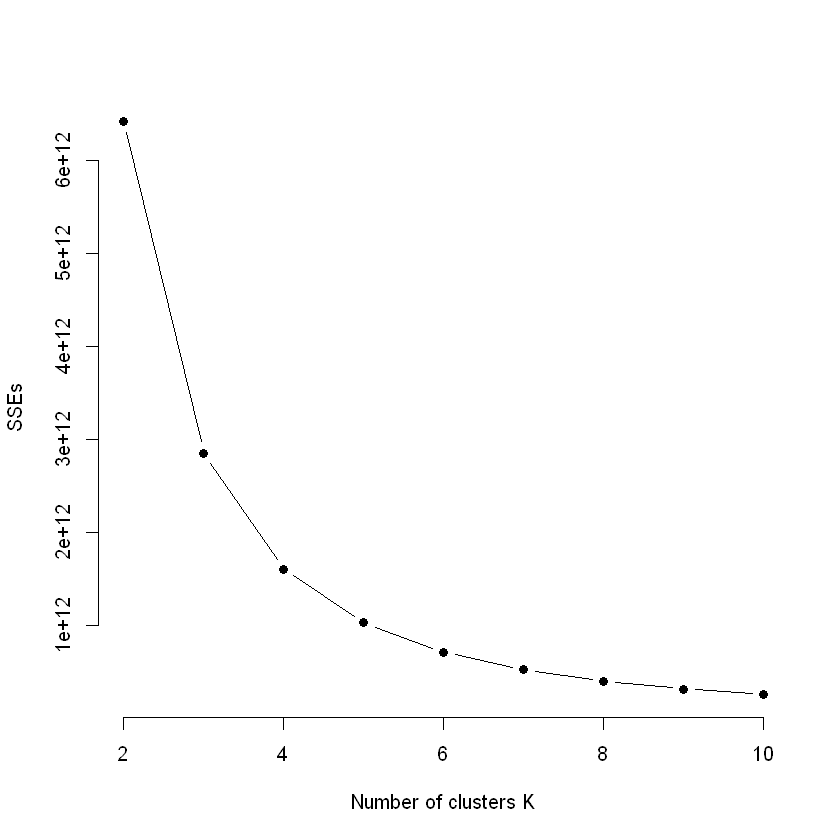

In [81]:
#Elbow_plot
k <- c(2:10)
SSE <- c()
for(i in k){
    clusters <- kmeans(na.omit(dataNumeric), i, nstart = 20)
    SSE <- c(SSE, clusters$tot.withinss)
}
print(SSE)
plot(k,SSE,type = "b", pch = 19, frame = FALSE, 
       xlab = "Number of clusters K",
       ylab = "SSEs")

In [82]:
avg_sil <- function(k) {
  km.res <- kmeans(dataNumeric, k, nstart = 25)
  ss <- silhouette(km.res$cluster, dist(data))
  mean(ss[, 3])
}

# Compute and plot wss for k = 2 to k = 15
k.values <- 2:10
avg_sil_values <- c()
# extract avg silhouette for 2-15 clusters
for(i in k.values){
    avg_sil_values <- c(avg_sil_values,avg_sil(i))
}


plot(k.values, avg_sil_values,
       type = "b", pch = 19, frame = FALSE, 
       xlab = "Number of clusters K",
       ylab = "Average Silhouettes")

ERROR: Error: cannot allocate vector of size 17.0 Gb


In [83]:
fviz_nbclust(dataNumeric, kmeans, method = "silhouette")

ERROR: Error: cannot allocate vector of size 17.0 Gb
